In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
assess_df = pd.read_csv('assessments.csv', skipinitialspace = True)
assess_df.head()

,id,master_user_id,created_at,user_age,all_devices_count,bank_sms_count,cibil_obligations,cibil_score,matched_devices_count,messages_count,...,sms_unique_days_count,stated_income,suit_filed_count_52,suit_filed_wilful_default_count_52,sum_overdue_amount_52,sum_overdue_amount_cc_52,sum_overdue_amount_non_cc_52,unsecured_inquiry_count_9,wilful_default_count_52,written_off_count_52
0,640,207,2016-10-17 15:02:01.913187+00:00,21.0,0.0,0.0,3441.0,4.0,0.0,0.0,...,0.0,12000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,647,2623,2016-10-17 15:02:01.953184+00:00,32.0,1.0,76.0,0.0,-1.0,1.0,220.0,...,53.0,38000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,649,2937,2016-10-17 15:02:01.961544+00:00,37.0,1.0,45.0,1050.0,715.0,1.0,234.0,...,54.0,22000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
3,652,1502,2016-10-17 15:02:01.974603+00:00,32.0,1.0,5.0,7910.0,715.0,1.0,30.0,...,8.0,40000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
4,675,2265,2016-10-17 15:02:02.090573+00:00,50.0,1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,18000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0


In [3]:
loans_df = pd.read_csv('loans.csv', skip_blank_lines = True, skipinitialspace= True)
loans_df.head()

,id,master_user_id,created_at,days_past_due
0,1129,12,2016-06-24 10:24:42.747000+00:00,0
1,46,12,2016-01-27 02:41:18.600000+00:00,0
2,55,27,2016-02-03 05:34:56.029000+00:00,0
3,48,28,2016-01-28 01:32:40.385000+00:00,0
4,50,31,2016-01-28 08:21:04.320000+00:00,0


In [4]:
assess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7353 entries, 0 to 7352
Data columns (total 31 columns):
id                                    7353 non-null int64
master_user_id                        7353 non-null int64
created_at                            7353 non-null object
user_age                              7350 non-null float64
all_devices_count                     7350 non-null float64
bank_sms_count                        7350 non-null float64
cibil_obligations                     6515 non-null float64
cibil_score                           6515 non-null float64
matched_devices_count                 7350 non-null float64
messages_count                        7350 non-null float64
monthly_capacity                      7353 non-null int64
product_type                          7353 non-null object
residence_tenure_in_weeks             6515 non-null float64
restructured_loan_count_52            7350 non-null float64
salary_day_of_month                   1746 non-null float64
s

In [5]:
loans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 4 columns):
id                7628 non-null int64
master_user_id    7628 non-null int64
created_at        7628 non-null object
days_past_due     7628 non-null int64
dtypes: int64(3), object(1)
memory usage: 238.5+ KB


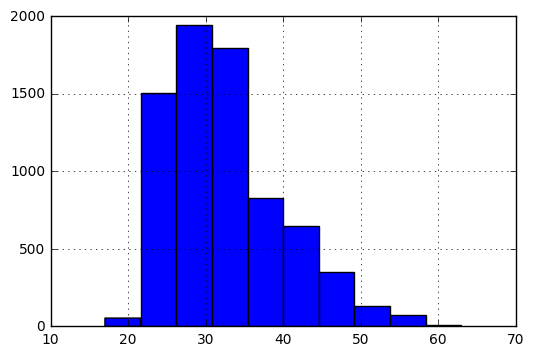

In [6]:
assess_df['user_age'].hist()

In [7]:
assess_df['product_type'].unique()

array(['flexi', 'premium'], dtype=object)

In [8]:
assess_df['scheme'].unique()

array([nan, 'uber', 'ola'], dtype=object)

In [9]:
assess_df.loc[assess_df['product_type'] == 'flexi', 'product_type'] = 0
assess_df.loc[assess_df['product_type'] == 'premium', 'product_type'] = 1
assess_df.head()

,id,master_user_id,created_at,user_age,all_devices_count,bank_sms_count,cibil_obligations,cibil_score,matched_devices_count,messages_count,...,sms_unique_days_count,stated_income,suit_filed_count_52,suit_filed_wilful_default_count_52,sum_overdue_amount_52,sum_overdue_amount_cc_52,sum_overdue_amount_non_cc_52,unsecured_inquiry_count_9,wilful_default_count_52,written_off_count_52
0,640,207,2016-10-17 15:02:01.913187+00:00,21.0,0.0,0.0,3441.0,4.0,0.0,0.0,...,0.0,12000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,647,2623,2016-10-17 15:02:01.953184+00:00,32.0,1.0,76.0,0.0,-1.0,1.0,220.0,...,53.0,38000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,649,2937,2016-10-17 15:02:01.961544+00:00,37.0,1.0,45.0,1050.0,715.0,1.0,234.0,...,54.0,22000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
3,652,1502,2016-10-17 15:02:01.974603+00:00,32.0,1.0,5.0,7910.0,715.0,1.0,30.0,...,8.0,40000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
4,675,2265,2016-10-17 15:02:02.090573+00:00,50.0,1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,18000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0


In [10]:
# drop unnecessary columns which won't be helpful in prediction

assess_df.drop(['created_at','all_devices_count', 'bank_sms_count', 'matched_devices_count', 'messages_count', 'restructured_loan_count_52',
             'sms_days_count', 'sms_unique_days_count'], axis =1 , inplace = True)

In [11]:
# drop columns with too less values 

assess_df.drop(['salary_day_of_month', 'salary_estimate','salary_estimate_type','salary_in_payslip', 'scheme'],
              axis = 1 , inplace = True)
assess_df.head()

,id,master_user_id,user_age,cibil_obligations,cibil_score,monthly_capacity,product_type,residence_tenure_in_weeks,secured_inquiry_count_9,stated_income,suit_filed_count_52,suit_filed_wilful_default_count_52,sum_overdue_amount_52,sum_overdue_amount_cc_52,sum_overdue_amount_non_cc_52,unsecured_inquiry_count_9,wilful_default_count_52,written_off_count_52
0,640,207,21.0,3441.0,4.0,3759,0,28.0,0.0,12000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
1,647,2623,32.0,0.0,-1.0,22800,0,98.0,0.0,38000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
2,649,2937,37.0,1050.0,715.0,7750,0,67.0,0.0,22000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
3,652,1502,32.0,7910.0,715.0,16090,0,181.0,0.0,40000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0
4,675,2265,50.0,0.0,-1.0,7200,0,16.0,0.0,18000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0


In [12]:
assess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7353 entries, 0 to 7352
Data columns (total 18 columns):
id                                    7353 non-null int64
master_user_id                        7353 non-null int64
user_age                              7350 non-null float64
cibil_obligations                     6515 non-null float64
cibil_score                           6515 non-null float64
monthly_capacity                      7353 non-null int64
product_type                          7353 non-null object
residence_tenure_in_weeks             6515 non-null float64
secured_inquiry_count_9               7350 non-null float64
stated_income                         7353 non-null int64
suit_filed_count_52                   7350 non-null float64
suit_filed_wilful_default_count_52    7350 non-null float64
sum_overdue_amount_52                 6515 non-null float64
sum_overdue_amount_cc_52              3768 non-null float64
sum_overdue_amount_non_cc_52          3768 non-null float64
un

In [13]:
# treating missing values - replacing with most frequent value
# user_age
assess_df['user_age'].fillna(assess_df['user_age'].mode()[0], inplace = True)

# secured_inquiry_count_9
assess_df['secured_inquiry_count_9'].fillna(assess_df['secured_inquiry_count_9'].mode()[0], inplace = True)

#suit_filed_count_52
assess_df['suit_filed_count_52'].fillna(assess_df['suit_filed_count_52'].mode()[0], inplace = True)

#suit_filed_wilful_default_count_52
assess_df['suit_filed_wilful_default_count_52'].fillna(assess_df['suit_filed_wilful_default_count_52'].mode()[0], inplace = True)

#unsecured_inquiry_count_9
assess_df['unsecured_inquiry_count_9'].fillna(assess_df['unsecured_inquiry_count_9'].mode()[0], inplace = True)

#wilful_default_count_52
assess_df['wilful_default_count_52'].fillna(assess_df['wilful_default_count_52'].mode()[0], inplace = True)

#written_off_count_52 
assess_df['written_off_count_52'].fillna(assess_df['written_off_count_52'].mode()[0], inplace = True)

In [14]:
assess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7353 entries, 0 to 7352
Data columns (total 18 columns):
id                                    7353 non-null int64
master_user_id                        7353 non-null int64
user_age                              7353 non-null float64
cibil_obligations                     6515 non-null float64
cibil_score                           6515 non-null float64
monthly_capacity                      7353 non-null int64
product_type                          7353 non-null object
residence_tenure_in_weeks             6515 non-null float64
secured_inquiry_count_9               7353 non-null float64
stated_income                         7353 non-null int64
suit_filed_count_52                   7353 non-null float64
suit_filed_wilful_default_count_52    7353 non-null float64
sum_overdue_amount_52                 6515 non-null float64
sum_overdue_amount_cc_52              3768 non-null float64
sum_overdue_amount_non_cc_52          3768 non-null float64
un

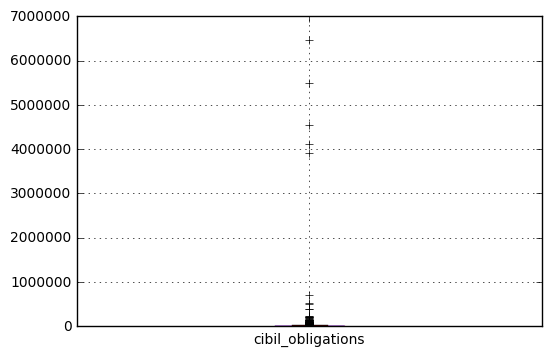

In [15]:
assess_df.boxplot(column = 'cibil_obligations')

In [16]:
data_df = pd.merge(assess_df, loans_df, on = 'master_user_id', how = 'inner')
data_df.head()

,id_x,master_user_id,user_age,cibil_obligations,cibil_score,monthly_capacity,product_type,residence_tenure_in_weeks,secured_inquiry_count_9,stated_income,...,suit_filed_wilful_default_count_52,sum_overdue_amount_52,sum_overdue_amount_cc_52,sum_overdue_amount_non_cc_52,unsecured_inquiry_count_9,wilful_default_count_52,written_off_count_52,id_y,created_at,days_past_due
0,640,207,21.0,3441.0,4.0,3759,0,28.0,0.0,12000,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,150,2016-02-29 12:01:59.109000+00:00,0
1,640,207,21.0,3441.0,4.0,3759,0,28.0,0.0,12000,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,3370,2016-08-10 04:54:56.464000+00:00,3
2,640,207,21.0,3441.0,4.0,3759,0,28.0,0.0,12000,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,12023,2016-12-11 14:52:55.413000+00:00,0
3,647,2623,32.0,0.0,-1.0,22800,0,98.0,0.0,38000,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1281,2016-07-05 16:56:26.990000+00:00,98
4,649,2937,37.0,1050.0,715.0,7750,0,67.0,0.0,22000,...,0.0,0.0,NaN,NaN,0.0,0.0,0.0,1412,2016-07-12 08:26:32.454000+00:00,36


In [17]:
# drop id_x, id_y and created_at column

data_df.drop(['id_x', 'id_y', 'created_at'], axis = 1, inplace = True)

In [18]:
# function for default column (days_past_due)

def get_default(x):
    return 1 if x > 60 else 0

data_df['default'] = data_df['days_past_due'].apply(get_default)

In [19]:
# drop days_past_due column

data_df.drop(['days_past_due'], axis =1, inplace = True)
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 18 columns):
master_user_id                        9006 non-null int64
user_age                              9006 non-null float64
cibil_obligations                     7979 non-null float64
cibil_score                           7979 non-null float64
monthly_capacity                      9006 non-null int64
product_type                          9006 non-null object
residence_tenure_in_weeks             7979 non-null float64
secured_inquiry_count_9               9006 non-null float64
stated_income                         9006 non-null int64
suit_filed_count_52                   9006 non-null float64
suit_filed_wilful_default_count_52    9006 non-null float64
sum_overdue_amount_52                 7979 non-null float64
sum_overdue_amount_cc_52              4149 non-null float64
sum_overdue_amount_non_cc_52          4149 non-null float64
unsecured_inquiry_count_9             9006 non-null float64


In [20]:
# treating missing values- filling NaN values by 0

# cibil_obligations
data_df['cibil_obligations'].fillna(0, inplace = True)

#cibil score
data_df['cibil_score'].fillna(0, inplace = True)

#residence tenure in weeks
data_df['residence_tenure_in_weeks'].fillna(data_df['residence_tenure_in_weeks'].median(), inplace = True)

#sum_overdue_amount_52
data_df['sum_overdue_amount_52'].fillna(0, inplace = True)

#sum_overdue_amount_cc_52
data_df['sum_overdue_amount_cc_52'].fillna(0, inplace = True)

#sum_overdue_amount_non_cc_52
data_df['sum_overdue_amount_non_cc_52'].fillna(0, inplace = True)

In [32]:
data_df.info()
data_df['default'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9006 entries, 0 to 9005
Data columns (total 18 columns):
master_user_id                        9006 non-null int64
user_age                              9006 non-null float64
cibil_obligations                     9006 non-null float64
cibil_score                           9006 non-null float64
monthly_capacity                      9006 non-null int64
product_type                          9006 non-null object
residence_tenure_in_weeks             9006 non-null float64
secured_inquiry_count_9               9006 non-null float64
stated_income                         9006 non-null int64
suit_filed_count_52                   9006 non-null float64
suit_filed_wilful_default_count_52    9006 non-null float64
sum_overdue_amount_52                 9006 non-null float64
sum_overdue_amount_cc_52              9006 non-null float64
sum_overdue_amount_non_cc_52          9006 non-null float64
unsecured_inquiry_count_9             9006 non-null float64


array([0, 1])

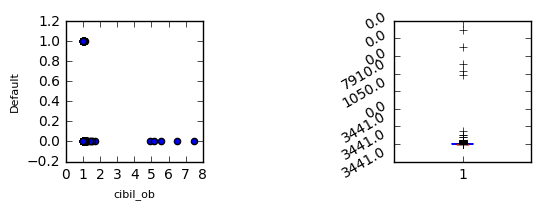

In [22]:
#plot cibil obligations

fig = plt.figure()
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,3)

ax1.scatter(data_df['cibil_obligations'], data_df['default'])
ax1.set_xlabel('cibil_ob', fontsize = 8)
ax1.set_xticklabels(labels = range(0,10000), rotation = 0)
ax1.set_ylabel('Default', fontsize = 8)

ax2.boxplot(data_df['cibil_obligations'], range(0,100000))
ax2.set_yticklabels(data_df['cibil_obligations'], rotation = 30)

plt.show()

In [23]:
data_df.corr()

,master_user_id,user_age,cibil_obligations,cibil_score,monthly_capacity,residence_tenure_in_weeks,secured_inquiry_count_9,stated_income,suit_filed_count_52,suit_filed_wilful_default_count_52,sum_overdue_amount_52,sum_overdue_amount_cc_52,sum_overdue_amount_non_cc_52,unsecured_inquiry_count_9,wilful_default_count_52,written_off_count_52,default
master_user_id,1.000000,0.115673,0.019464,0.054406,-0.086596,0.076785,0.099584,-0.054434,0.033943,-0.004926,0.017921,0.043068,0.141280,0.157623,0.001371,0.005170,-0.197829
user_age,0.115673,1.000000,0.042433,-0.004199,0.000656,0.201190,0.017422,0.037258,0.034167,0.009933,0.057972,0.038660,0.084273,-0.136411,0.000969,0.089103,0.000574
cibil_obligations,0.019464,0.042433,1.000000,0.052169,-0.015397,0.026721,0.039815,0.012833,0.006043,0.000967,0.006236,0.002009,0.016680,0.001328,-0.001126,0.001314,-0.009183
cibil_score,0.054406,-0.004199,0.052169,1.000000,-0.029336,0.177473,0.071062,0.048400,0.019669,0.007711,0.029595,0.015234,0.050794,0.168784,0.003417,0.082618,-0.053188
monthly_capacity,-0.086596,0.000656,-0.015397,-0.029336,1.000000,-0.038203,-0.015801,0.971792,-0.008643,-0.005493,-0.014140,-0.005725,-0.032356,0.009469,-0.000578,-0.008326,0.006004
residence_tenure_in_weeks,0.076785,0.201190,0.026721,0.177473,-0.038203,1.000000,0.010431,-0.021915,0.040672,0.013821,0.068452,0.022411,0.101798,-0.090924,0.008475,0.076925,0.025201
secured_inquiry_count_9,0.099584,0.017422,0.039815,0.071062,-0.015801,0.010431,1.000000,-0.000423,-0.006790,-0.002525,-0.005194,-0.004977,0.010952,0.110924,-0.002662,0.000421,-0.020162
stated_income,-0.054434,0.037258,0.012833,0.048400,0.971792,-0.021915,-0.000423,1.000000,-0.003063,-0.002949,-0.006844,-0.003131,-0.010198,0.010517,-0.001578,0.007071,0.000698
suit_filed_count_52,0.033943,0.034167,0.006043,0.019669,-0.008643,0.040672,-0.006790,-0.003063,1.000000,-0.000538,0.061075,0.070812,0.135654,-0.015711,-0.000567,0.096737,0.001809
suit_filed_wilful_default_count_52,-0.004926,0.009933,0.000967,0.007711,-0.005493,0.013821,-0.002525,-0.002949,-0.000538,1.000000,0.438801,-0.000491,-0.001498,-0.006897,-0.000211,0.045050,-0.003733


In [55]:
# creating model

predictor = data_df.columns.tolist()[:17]
# print(predictor)

lr = LogisticRegression()
kf = KFold(n_splits = 3, shuffle = True, random_state = 1)
predictions = []
score = []

for train,test in kf.split(data_df):
    train_predictors = data_df[predictor].iloc[train,:]
    train_target = data_df['default'].iloc[train]
    lr.fit(train_predictors,train_target)
    test_predictors = data_df[predictor].iloc[test,:]
    test_target = data_df['default'].iloc[test]
    test_pred = lr.predict(test_predictors)
   
    accuracy = accuracy_score(test_target, test_pred)
    score.append(accuracy)
    
    p, r, f1, support = precision_recall_fscore_support(test_target, test_pred)
    
    auc_roc = roc_auc_score(test_target, test_pred)

#calculating average accuracy , precision, recall, F1 score   
average_score = np.mean(score)
print('Average accuracy is', average_score)

accuracies = cross_val_score(lr, data_df[predictor], data_df['default'],scoring = 'accuracy', cv = 4)    
avg_acc = np.mean(accuracies)
print('average accuracy by cross validation is' , avg_acc)

avg_p = np.mean(p)
print('Average precision is', avg_p)

avg_r = np.mean(r)
print('Average recall is', avg_r)

avg_f1 = np.mean(f1)
print('Average F1 score is', avg_f1)

avg_auc_roc = np.mean(auc_roc)
print('Average AUC - roc score is', avg_auc_roc)

# predictions = np.concatenate(predictions, axis=0)
# accuracy = sum(predictions[predictions == data_df["default"]]) / len(predictions)
# print(predictions)

/usr/local/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Average accuracy is 0.934710193205
average accuracy by cross validation is 0.934487862641
Average precision is 0.467854763491
Average recall is 0.5
Average F1 score is 0.48339356393
Average AUC - roc score is 0.5
